<a href="https://colab.research.google.com/github/vgorbikov/mldlvsu_labs/blob/main/Lab_1_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1
«Изучение особенностей устройства и функционирования простейшего
персептрона в контексте задачи классификации»

**Цель работы** — освоение ключевых принципов обучения с учителем, с
акцентом на решение задачи бинарной классификации. В ходе выполнения
работы исследуются особенности устройства и принципы функционирования
математической модели искусственного нейрона на примере решения
логических операций OR, AND и XOR.

## ЗАДАНИЕ
1. Осуществить обучение нейрона выполнению функции логического
«ИЛИ».
2. Осуществить попытку обучения одного нейрона выполнению функции
«Исключающего ИЛИ» (XOR) и посмотреть на результат.
3. Построить и обучить модель для решения функции «Исключающего
ИЛИ» (XOR).
4. Построить график активационной функции заданного вида (по
вариантам, по номеру в списке).

### Вариант 9
Активацтонная функция **Softmax** (область значений (0, 1)):
$$
f(x) = \frac{e^{x_i}}{\sum^J_{j=1} e^{x_j}}, i=1...J
$$
Где $J$ - размер входного вектора

## Решение

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def softmax(x: list):
  return np.exp(x)/np.sum(np.exp(x))


[np.float64(4.5397868702434395e-05), np.float64(5.556064893935847e-05), np.float64(6.799831744235803e-05), np.float64(8.322001972209245e-05), np.float64(0.0001018488154272127), np.float64(0.00012464714594414533), np.float64(0.00015254798624649647), np.float64(0.00018669294496130814), np.float64(0.00022847885532128423), np.float64(0.00027961473864919224), np.float64(0.00034219143371662803), np.float64(0.00041876668444437357), np.float64(0.0005124690821944584), np.float64(0.0006271249872756847), np.float64(0.0007674134299182661), np.float64(0.0009390550390618304), np.float64(0.001149042294880872), np.float64(0.001405919875508632), np.float64(0.0017201255952192598), np.float64(0.0021044044291184333), np.float64(0.0025743103931375314), np.float64(0.0031488135776798517), np.float64(0.003851032355930255), np.float64(0.004709113572114011), np.float64(0.005757286121908184), np.float64(0.007037115364564376), np.float64(0.008598986610189428), np.float64(0.010503844513285416), np.float64(0.012825

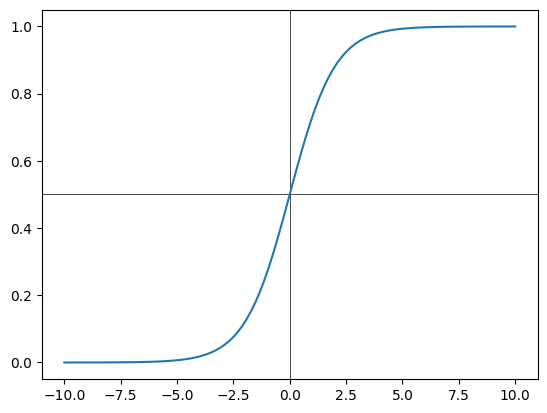

In [80]:
xs = np.linspace(-10, 10, 100)
xs2 = np.zeros((100,))

ys = [softmax([xs[i], xs2[i]])[0] for i in range(100)]
print(ys)

plt.axhline(0.5, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.plot(xs, ys)
plt.show()

In [125]:
# Входные данные
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32) # входные данные x1 и x2 (признаки, характеризующие объект)
Y_OR = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32) # желаемый выход (метки классов для каждого объекта)
Y_XOR = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)

In [141]:
class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_size, 1) # инициализируем линейный слой с одним нейроном (принимает на вход x размерностью input_size, а выдаёт на выходе одно значение)

    def forward(self, x):
      z = self.fc(x) # передаём в наш 1 нейрон входные сигналы x
      p = torch.sigmoid(z) # результат обработки нейроном входных сигналов z поступает в сигмоидальную функцию активации, которая выдаёт вероятность принадлежности к классу 1
      return p

In [142]:
def train(model: nn.Module, x: torch.tensor, y: torch.tensor, epoch: int = 1000, lr: float = 1e-2):
  model.train() # переключаем модель в режим обучения
  loss_f = nn.BCELoss() # задаём функцию ошибки
  optimizer = torch.optim.Adam(model.parameters(), lr=lr) # задаём оптимизатор

  for epoch_no in range(epoch):
    outputs = model(x)
    loss = loss_f(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch: {epoch_no}/{epoch}; Loss: {loss.item()}')

    if torch.round(outputs).eq(y).all():
        print('Zaebca!')
        break

  return model

In [157]:
def test(model: nn.Module, x, y):
  model.eval()
  outs = model(x)

  good_answrs = 0

  for i in range(len(outs)):
    print(f'{x[i]} -> {outs[i]}')
    if outs[i] == y[i]:
      good_answrs += 1
  print(f'Test result: {good_answrs}/{len(y)}')

In [144]:
prcptrn = Perceptron(input_size=2)
prcptrn = train(prcptrn, X, Y_OR)

Epoch: 0/1000; Loss: 0.5544462203979492
Epoch: 1/1000; Loss: 0.5497801303863525
Epoch: 2/1000; Loss: 0.5452167391777039
Epoch: 3/1000; Loss: 0.5407569408416748
Epoch: 4/1000; Loss: 0.5364014506340027
Epoch: 5/1000; Loss: 0.5321506261825562
Epoch: 6/1000; Loss: 0.528005063533783
Epoch: 7/1000; Loss: 0.5239646434783936
Epoch: 8/1000; Loss: 0.5200294256210327
Epoch: 9/1000; Loss: 0.5161991715431213
Epoch: 10/1000; Loss: 0.5124732851982117
Epoch: 11/1000; Loss: 0.5088509917259216
Epoch: 12/1000; Loss: 0.5053315758705139
Epoch: 13/1000; Loss: 0.5019139051437378
Epoch: 14/1000; Loss: 0.4985964894294739
Epoch: 15/1000; Loss: 0.4953780770301819
Epoch: 16/1000; Loss: 0.4922567903995514
Epoch: 17/1000; Loss: 0.4892308712005615
Epoch: 18/1000; Loss: 0.48629823327064514
Epoch: 19/1000; Loss: 0.48345670104026794
Epoch: 20/1000; Loss: 0.4807038903236389
Epoch: 21/1000; Loss: 0.47803735733032227
Epoch: 22/1000; Loss: 0.4754544496536255
Epoch: 23/1000; Loss: 0.4729524254798889
Epoch: 24/1000; Loss: 0.

In [158]:
test(prcptrn, X, Y_OR)

tensor([0., 0.]) -> tensor([0.4982], grad_fn=<SelectBackward0>)
tensor([0., 1.]) -> tensor([0.7579], grad_fn=<SelectBackward0>)
tensor([1., 0.]) -> tensor([0.8621], grad_fn=<SelectBackward0>)
tensor([1., 1.]) -> tensor([0.9517], grad_fn=<SelectBackward0>)
Test result: 0/4


In [145]:
class StrongPerceptron(nn.Module):
    def __init__(self, input_size):
        super(StrongPerceptron, self).__init__()
        self.l1 = nn.Linear(input_size, 2) # инициализируем линейный слой с одним нейроном (принимает на вход x размерностью input_size, а выдаёт на выходе одно значение)
        self.l2 = nn.Linear(input_size, 1)

    def forward(self, x):
      z1 = self.l1(x) # передаём в наш 1 нейрон входные сигналы x
      p1 = torch.sigmoid(z1) # результат обработки нейроном входных сигналов z поступает в сигмоидальную функцию активации, которая выдаёт вероятность принадлежности к классу 1
      z2 = self.l2(p1)
      p2 = torch.sigmoid(z2)
      return p2

In [148]:
strong = StrongPerceptron(input_size=2)
strong = train(strong, X, Y_XOR)

Epoch: 0/1000; Loss: 0.9485512971878052
Epoch: 1/1000; Loss: 0.9383609294891357
Epoch: 2/1000; Loss: 0.9283897280693054
Epoch: 3/1000; Loss: 0.9186397790908813
Epoch: 4/1000; Loss: 0.9091125130653381
Epoch: 5/1000; Loss: 0.8998092412948608
Epoch: 6/1000; Loss: 0.8907303810119629
Epoch: 7/1000; Loss: 0.8818763494491577
Epoch: 8/1000; Loss: 0.8732466697692871
Epoch: 9/1000; Loss: 0.8648402094841003
Epoch: 10/1000; Loss: 0.8566558957099915
Epoch: 11/1000; Loss: 0.8486917018890381
Epoch: 12/1000; Loss: 0.8409454822540283
Epoch: 13/1000; Loss: 0.8334143161773682
Epoch: 14/1000; Loss: 0.8260949850082397
Epoch: 15/1000; Loss: 0.8189841508865356
Epoch: 16/1000; Loss: 0.8120777010917664
Epoch: 17/1000; Loss: 0.8053714036941528
Epoch: 18/1000; Loss: 0.7988607287406921
Epoch: 19/1000; Loss: 0.7925407886505127
Epoch: 20/1000; Loss: 0.7864067554473877
Epoch: 21/1000; Loss: 0.780453085899353
Epoch: 22/1000; Loss: 0.7746745347976685
Epoch: 23/1000; Loss: 0.7690656781196594
Epoch: 24/1000; Loss: 0.763